# <b>Retail Store Analysis</b>

Downloading dataset using kaggle API

In [20]:
# %pip install kaggle
import kaggle
!kaggle datasets download -d ankitbansal06/retail-orders

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
retail-orders.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting the file from the zip folder

In [21]:
import zipfile
zip_ref = zipfile.ZipFile('retail-orders.zip')
zip_ref.extractall()    # extracts file to dir
zip_ref.close()         # closes the file

Reading the csv file using pandas

In [22]:
# %pip install pandas as pd
import pandas as pd
df = pd.read_csv('orders.csv')
df

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3


## <b>Data Transformation</b>

Checking the datatypes of all the features (columns)

In [23]:
df.dtypes

Order Id             int64
Order Date          object
Ship Mode           object
Segment             object
Country             object
City                object
State               object
Postal Code          int64
Region              object
Category            object
Sub Category        object
Product Id          object
cost price           int64
List Price           int64
Quantity             int64
Discount Percent     int64
dtype: object

Each column has the correct datatype except the `order_date` so we will convert it into datetime datatype

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format ="%Y-%m-%d")
df.dtypes

Order Id                     int64
Order Date          datetime64[ns]
Ship Mode                   object
Segment                     object
Country                     object
City                        object
State                       object
Postal Code                  int64
Region                      object
Category                    object
Sub Category                object
Product Id                  object
cost price                   int64
List Price                   int64
Quantity                     int64
Discount Percent             int64
dtype: object

In [25]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In the above cell we noticed that there are values which should be treated as null i.e. 'Not Available', 'unknown'

In [26]:
df = pd.read_csv('orders.csv', na_values = ['Not Available','unknown'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [27]:
df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

We will convert the column names into lowercase and separated by an `_` underscore

In [28]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

df.to_csv('orders_cleaned.csv', index=False)

df = pd.read_csv('orders_cleaned.csv')
print(df.columns)

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')


## <b>Feature Engineering</b>

Now we will create new features (columns): `discount`, `sale_price` and `profit`

In [29]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [30]:
df['discount'] = df['list_price'] * df['discount_percent'] / 100
df['discount'].head(5)

0     5.2
1    21.9
2     0.5
3    19.2
4     1.0
Name: discount, dtype: float64

In [31]:
df['sale_price'] = df['list_price'] - df['discount']
df['sale_price'].head(5)

0    254.8
1    708.1
2      9.5
3    940.8
4     19.0
Name: sale_price, dtype: float64

In [32]:
df['profit'] = df['sale_price'] - df['cost_price']
df['profit'].head(5)

0     14.8
1    108.1
2     -0.5
3    160.8
4     -1.0
Name: profit, dtype: float64

In [33]:
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


## <b>Data Cleaning</b>

Dropping unwanted columns

In [34]:
df.drop(columns = ['list_price','cost_price','discount_percent'], inplace = True)
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


## <b>Connecting to PostgreSQL</b>

In [35]:
# %pip install sqlalchemy psycopg2-binary 
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Credentials
user = "postgres"
password = quote_plus("Postgresql@123")  # This encodes the special character '@'
host = "localhost"
port = "5432"
database = "retail_store"

# SQLAlchemy engine with encoded password
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

# Now push dataframe to PostgreSQL
df.to_sql("Orders", con=engine, if_exists="replace", index=False)

994

## <b>Key Business Questions</b>

<b>Question 1:</b> What is the total sales and profit over time (monthly/yearly)?

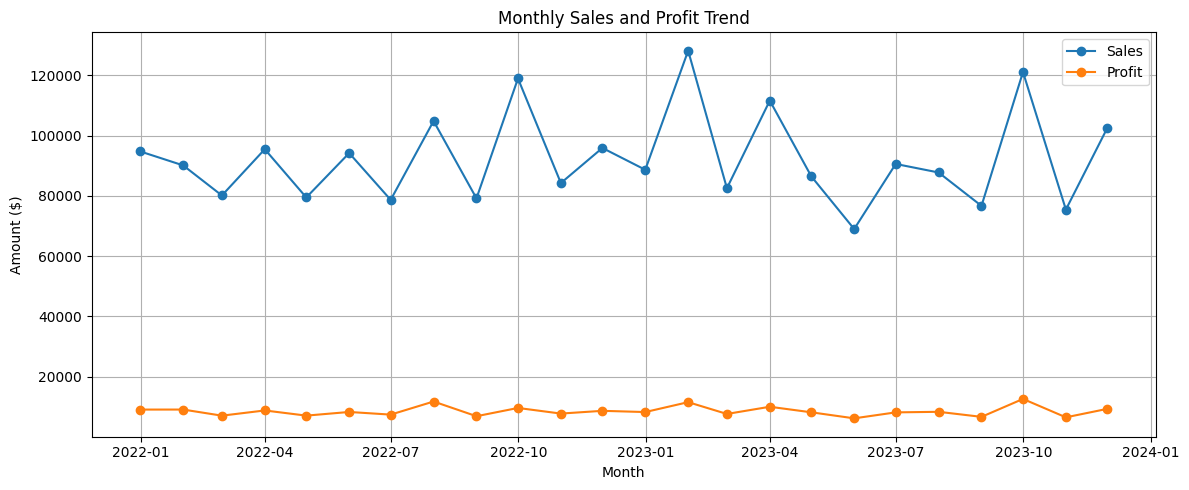

In [36]:
import matplotlib.pyplot as plt

query = """
SELECT
    DATE_TRUNC('month', "order_date"::date) AS "month",
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM "Orders"
GROUP BY DATE_TRUNC('month', "order_date"::date)
ORDER BY "month";
"""

df_monthly = pd.read_sql(query, con=engine)

# Plotting
plt.figure(figsize=(12,5))
plt.plot(df_monthly['month'], df_monthly['total_sales'], label='Sales', marker='o')
plt.plot(df_monthly['month'], df_monthly['total_profit'], label='Profit', marker='o')
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<i>Insight:</i> <br><br>Sales and profit change month to month. Some months show high sales, while others are low, which could be due to seasonal trends or promotions.

<b>Question 2.</b> Which regions are generating the highest profit and sales?

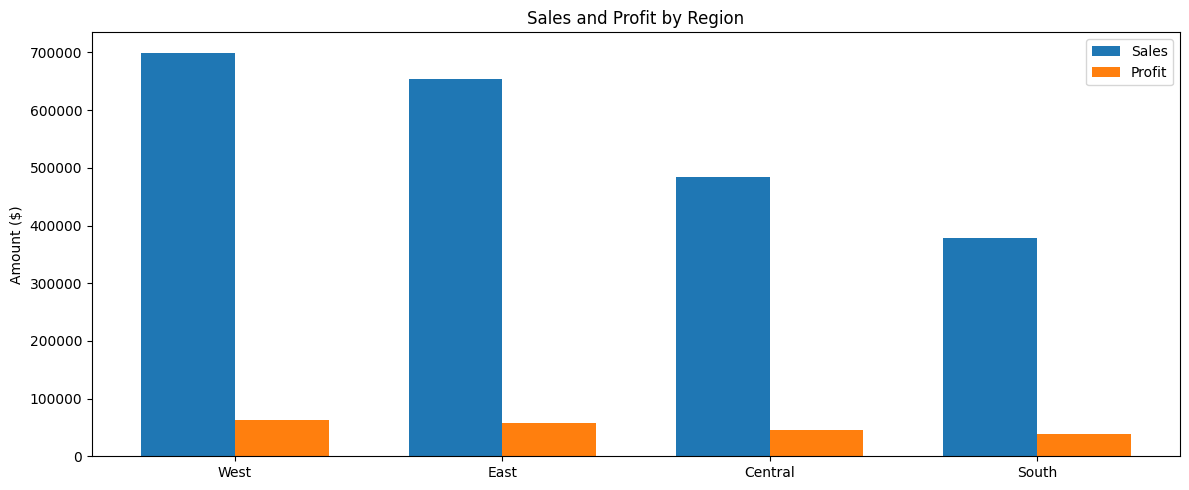

In [37]:
query = """
SELECT
    "region",
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM "Orders"
GROUP BY "region"
ORDER BY "total_sales" DESC;
"""

df_region = pd.read_sql(query, con=engine)

# Plotting Sales and Profit side-by-side
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))
bar_width = 0.35
x = np.arange(len(df_region['region']))

plt.bar(x, df_region['total_sales'], width=bar_width, label='Sales')
plt.bar(x + bar_width, df_region['total_profit'], width=bar_width, label='Profit')

plt.xticks(x + bar_width/2, df_region['region'])
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Region')
plt.legend()
plt.tight_layout()
plt.show()

<i>Insight:</i> <br><br> Some regions like the West or East have higher sales and profit than others. This might be because of more customers or bigger cities in those areas.

<b>Question 3.</b> Most profitable categories and sub-categories?

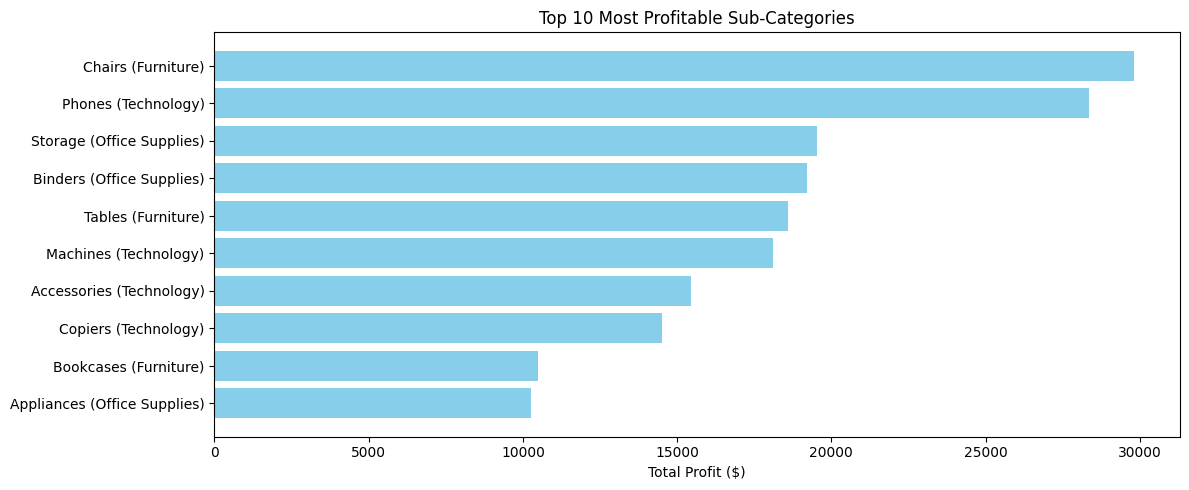

In [38]:
query = """
SELECT
    "category",
    "sub_category",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM
    "Orders"
GROUP BY
    "category", "sub_category"
ORDER BY
    "total_profit" DESC;
"""

df_cat = pd.read_sql(query, con=engine)

# Plot top 10 sub-categories by profit
top10 = df_cat.head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.barh(top10['sub_category'] + " (" + top10['category'] + ")", top10['total_profit'], color='skyblue')
plt.xlabel('Total Profit ($)')
plt.title('Top 10 Most Profitable Sub-Categories')
plt.gca().invert_yaxis()  # Highest profit at top
plt.tight_layout()
plt.show()

<i>Insight:</i> <br><br>Sub-categories like Chair and Phones are giving the highest profit. Category like Technology seem to perform better overall.

<b>Question 4.</b> Which ship modes are most used and profitable

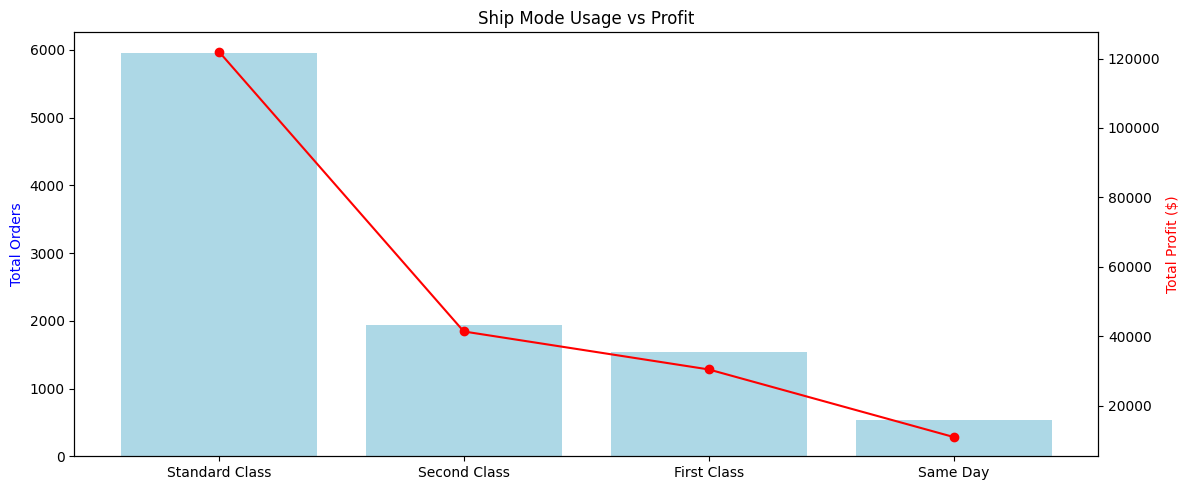

In [39]:
query = """
SELECT
    "ship_mode",
    COUNT(*) AS total_orders,
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM "Orders"
GROUP BY "ship_mode"
ORDER BY "total_orders" DESC;
"""
df_ship = pd.read_sql(query, con=engine)

# Handle missing values in ship_mode
df_ship = df_ship.dropna(subset=['ship_mode'])

# Plot
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,5))

# Bar plot for order count
ax1.bar(df_ship['ship_mode'], df_ship['total_orders'], color='lightblue', label='Total Orders')
ax1.set_ylabel('Total Orders', color='blue')

# Line plot for total profit
ax2 = ax1.twinx()
ax2.plot(df_ship['ship_mode'], df_ship['total_profit'], color='red', marker='o', label='Total Profit')
ax2.set_ylabel('Total Profit ($)', color='red')

plt.title('Ship Mode Usage vs Profit')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


<i>Insight:</i> <br><br> Standard Class is the most used shipping method. Some other shipping modes like Second Class also bring in good profit, even if they are not used as often.

<b>Question 5:</b> Top-performing cities/states by sales and profit.

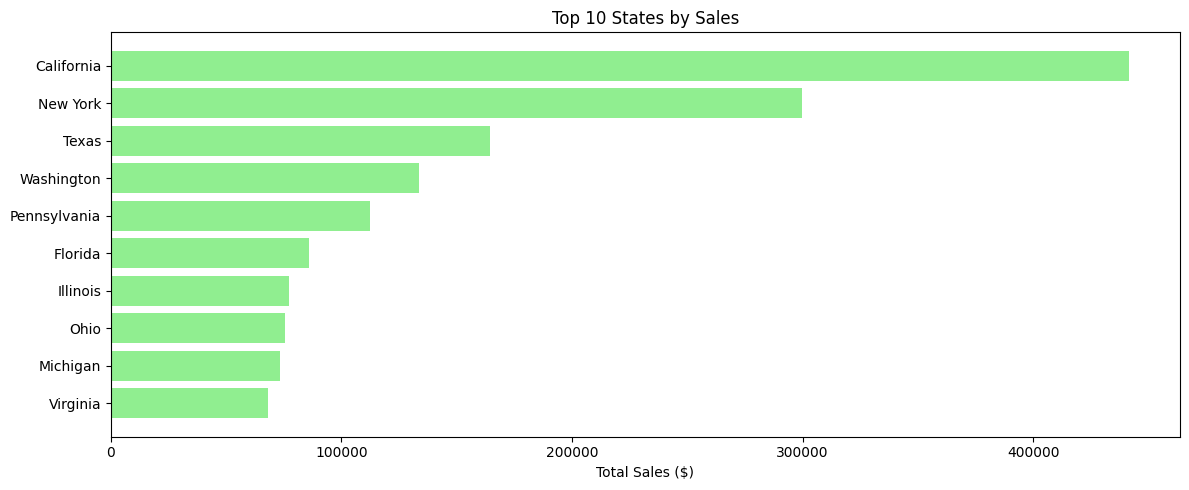

In [40]:
query = """
SELECT
    "state",
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM "Orders"
GROUP BY "state"
ORDER BY "total_sales" DESC
LIMIT 10;
"""

df_state = pd.read_sql(query, con=engine)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.barh(df_state['state'], df_state['total_sales'], color='lightgreen', label='Total Sales')
plt.xlabel('Total Sales ($)')
plt.title('Top 10 States by Sales')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<i>Insight:</i><br><br> California and New York are the leading states having the highest sales. However, some other states also contribute well to the profit even with lower sales numbers.

<b>Question 6:</b> Impact of discount on profit

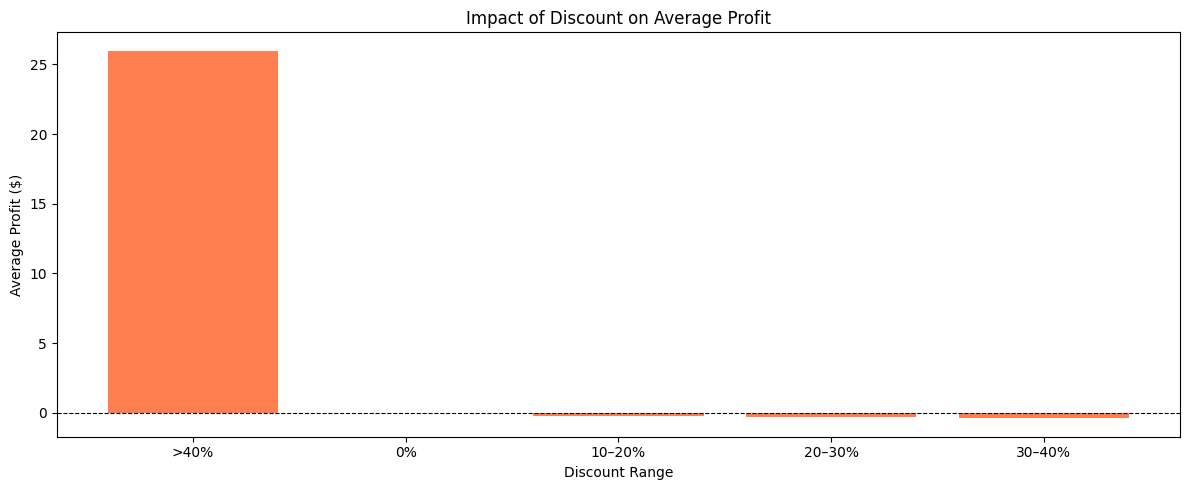

In [41]:
from sqlalchemy import text

query = text("""
SELECT
    CASE
        WHEN "discount" = 0 THEN '0%'
        WHEN "discount" > 0 AND "discount" <= 0.1 THEN '0–10%'
        WHEN "discount" > 0.1 AND "discount" <= 0.2 THEN '10–20%'
        WHEN "discount" > 0.2 AND "discount" <= 0.3 THEN '20–30%'
        WHEN "discount" > 0.3 AND "discount" <= 0.4 THEN '30–40%'
        WHEN "discount" > 0.4 THEN '>40%'
    END AS "discount_range",
    ROUND(AVG("profit")::numeric, 2) AS "avg_profit",
    COUNT(*) AS "order_count"
FROM "Orders"
GROUP BY "discount_range"
ORDER BY "discount_range";
""")

df_discount = pd.read_sql(query, con=engine)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(df_discount['discount_range'], df_discount['avg_profit'], color='coral')
plt.xlabel('Discount Range')
plt.ylabel('Average Profit ($)')
plt.title('Impact of Discount on Average Profit')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # profit break-even line
plt.tight_layout()
plt.show()


<i>Insight</i> <br><br> Giving a higher discount usually reduces the profit. Small discounts are okay, but large discounts can lead to very low or even negative profits.

<b>Question 7:</b> Category-wise Sales and Profit Overview

([<matplotlib.axis.XTick at 0x17fa041f590>,
 [Text(0.175, 0, 'Technology'),
  Text(1.175, 0, 'Furniture'),
  Text(2.175, 0, 'Office Supplies')])

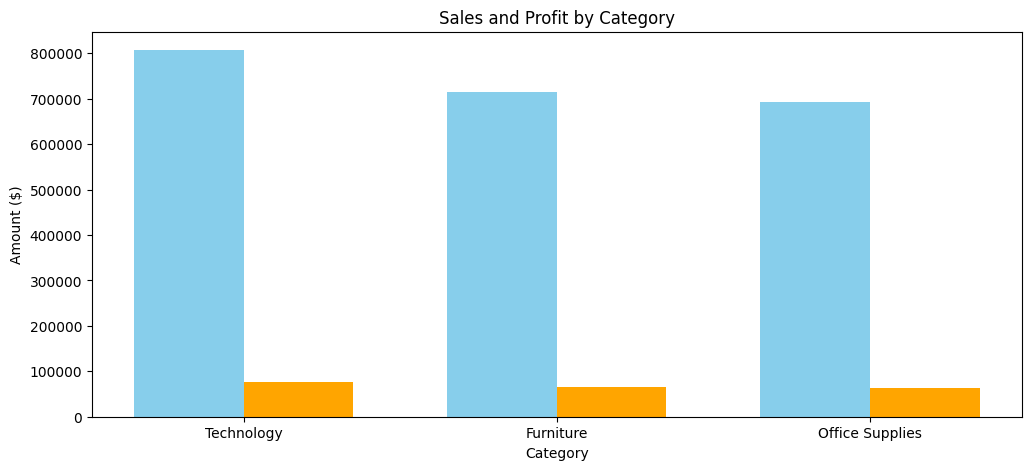

In [42]:
from sqlalchemy import text

query = text("""
SELECT 
    "category",
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM "Orders"
GROUP BY "category"
ORDER BY "total_sales" DESC;
""")

df_cat = pd.read_sql(query, con=engine)

# Plotting
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))
bar_width = 0.35
index = np.arange(len(df_cat))

plt.bar(index, df_cat['total_sales'], bar_width, label='Sales', color='skyblue')
plt.bar(index + bar_width, df_cat['total_profit'], bar_width, label='Profit', color='orange')

plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Category')
plt.xticks(index + bar_width/2, df_cat['category'])


<i>Insight:</i><br><br> Among all categories, Technology leads in both sales and profit, followed by Furniture and Office Supplies.

<b>Question 8:</b> Which customer segments bring the most sales and profit?

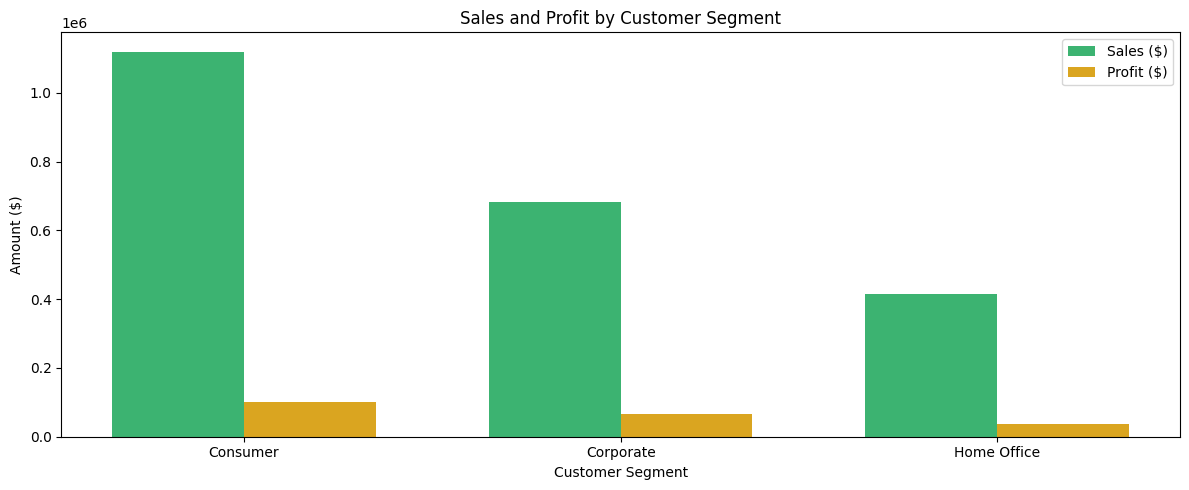

In [43]:
from sqlalchemy import text

query = text("""
SELECT 
    "segment",
    COUNT(*) AS "total_orders",
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit"
FROM "Orders"
GROUP BY "segment"
ORDER BY "total_sales" DESC;
""")

df_segment = pd.read_sql(query, con=engine)

# Plotting
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))
bar_width = 0.35
index = np.arange(len(df_segment))

plt.bar(index, df_segment['total_sales'], bar_width, label='Sales ($)', color='mediumseagreen')
plt.bar(index + bar_width, df_segment['total_profit'], bar_width, label='Profit ($)', color='goldenrod')

plt.xlabel('Customer Segment')
plt.ylabel('Amount ($)')
plt.title('Sales and Profit by Customer Segment')
plt.xticks(index + bar_width/2, df_segment['segment'])
plt.legend()
plt.tight_layout()
plt.show()


<i>Insight:</i> <br><br> The Consumer segment gives the most sales and profit while Corporate and Home Office segments also perform well in terms of sales.


<b>Question 9:</b> Does Profit Margin Vary Across Sub-Categories?

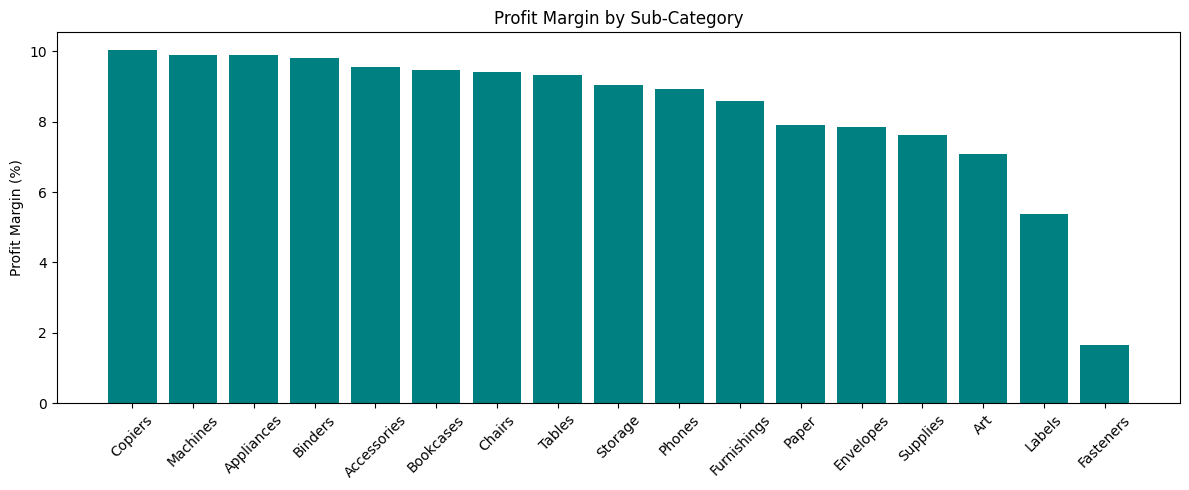

In [44]:
from sqlalchemy import text

query = text("""
SELECT 
    "sub_category",
    COUNT(*) AS "total_orders",
    ROUND(SUM("sale_price")::numeric, 2) AS "total_sales",
    ROUND(SUM("profit")::numeric, 2) AS "total_profit",
    ROUND(((SUM("profit") / SUM("sale_price")) * 100) ::numeric, 2) AS "profit_margin_pct"
FROM "Orders"
GROUP BY "sub_category"
ORDER BY "profit_margin_pct" DESC;
""")

df_margin = pd.read_sql(query, con=engine)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.bar(df_margin['sub_category'], df_margin['profit_margin_pct'], color='teal')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin by Sub-Category')
plt.tight_layout()
plt.show()


<i>Insight:</i><br><br> Yes, Profit Margin is varying in the sub-categories. For example, items like Copiers, Machines, Appliances give better profit compared to items like Binders.

